<a href="https://colab.research.google.com/github/Fadelhamkaa/Data-Mining-Data-Reduction-Transformation-and-Diszritization/blob/main/Muhammad_Fadel_Hamka_D_60200122116.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***PreProcessing (2) Data Reduksi, Transformasi dan Diskritisasi***

# ***SELEKSI ATRIBUT***

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

data = load_iris()
x = data.data
y = data.target

In [ ]:
model = LogisticRegression()

In [ ]:
selector = SequentialFeatureSelector(model, n_features_to_select=2, direction='forward')

In [ ]:
selector.fit(x,y)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=2)

In [ ]:
selected_features = selector.get_support()

selected_features_names = np.array(data.feature_names)[selected_features]
print("selected_features (names): ", selected_features_names)

selected_features (names):  ['petal length (cm)' 'petal width (cm)']


# ***REGRESI LINEAR***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.random.rand(100, 1) * 10
y = 2.5 * X + np.random.rand(100, 1) * 2

In [ ]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

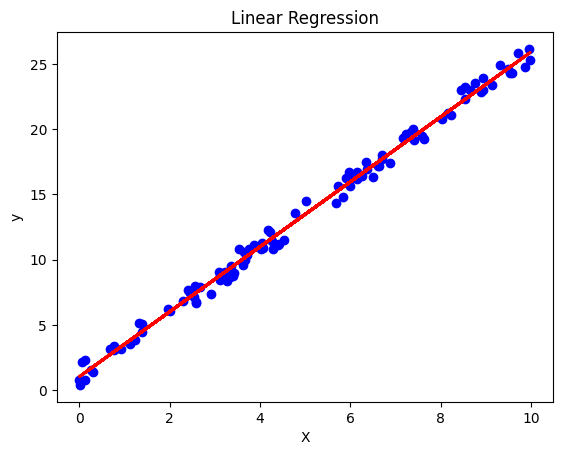

In [ ]:
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

In [ ]:
print(f"Model Coefficients: ", {model.coef_[0][0]})
print(f"Model Intercept: ", {model.intercept_[0]})

Model Coefficients:  {2.4911730964262984}
Model Intercept:  {1.012486266906226}


# ***HISTOGRAM (DATA REDUCTION)***

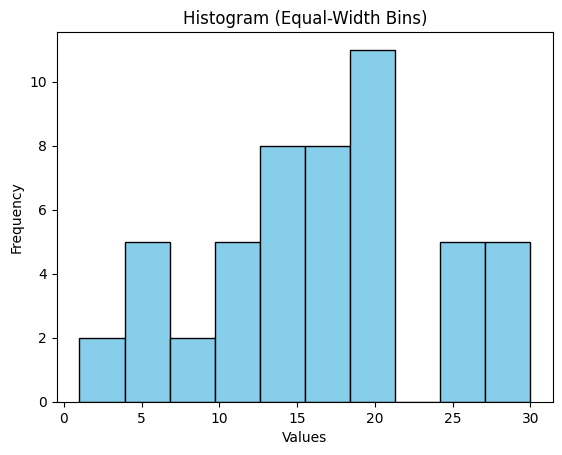

In [ ]:
import matplotlib.pyplot as plt

data = [1, 1, 5, 5, 5, 5, 5, 8, 8, 10, 10, 10, 10, 12, 14, 14, 14, 15, 15, 15, 15, 15, 18, 18, 18, 18, 18, 18, 18, 18, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 25, 25, 25, 25, 25, 28, 28, 30, 30, 30]

plt.hist(data, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram (Equal-Width Bins)')
plt.show()

# ***CLUSTERING (K-MEANS CLUSTERING)***

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [ ]:
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(X)

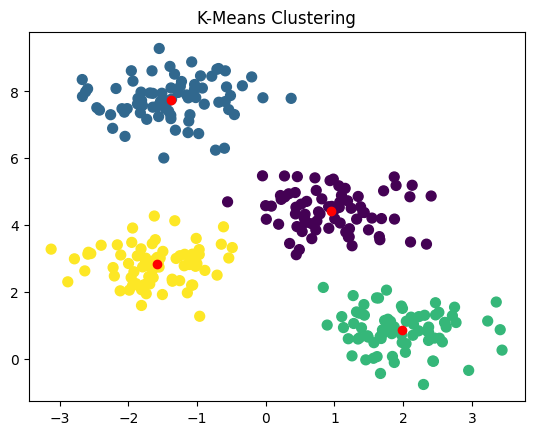

In [ ]:
#Plotting
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')
plt.title('K-Means Clustering')
plt.show()

# ***SAMPLING (SIMPLE RANDOM SAMPLING)***

In [ ]:
import numpy as np

data = np.random.randint(1, 100, 1000)

sample_size = 100
sample_data = np.random.choice(data, size=sample_size, replace=False)

print("Sampled Data:", sample_data)

Sampled Data: [55 69 55 38  5 26 63 73 46 11 52 40 44 71 68 62 45 71 75 37 56 14 12  8
 23 22  7 72 18 40 98 71 59 91 31 56 68 69 85 21 77 85 33 87 29 10 49 53
 86 20 40 61 93 77 65 28 63 49 59 40 69 44  1 38 26 79 27 40 40 32 36 80
 29 41  7 13 42 69 17 64 45 76  6 99 50 10 38 35 42 83 92 10 19 92 59 65
  9 56 68 39]


# ***DATA CUBE AGGREGATION (AGGREGATING SALES DATA)***

In [ ]:
import pandas as pd
data = {
    'Year' : [2008, 2008, 2000, 2000, 2010, 2010],
    'Branch' : ['A', 'B', 'A', 'B', 'A', 'B'],
    'Item' : ['TV', 'Laptop', 'TV', 'Laptop', 'TV', 'Laptop'],
    'Sales' : [1000, 1500, 1200, 1600, 1300, 1700]
}

df = pd.DataFrame(data)

cube = df.pivot_table(values='Sales', index=['Year', 'Branch'], columns='Item', aggfunc='sum')

print("Data Cube Aggregation:\n", cube)

Data Cube Aggregation:
 Item         Laptop      TV
Year Branch                
2000 A          NaN  1200.0
     B       1600.0     NaN
2008 A          NaN  1000.0
     B       1500.0     NaN
2010 A          NaN  1300.0
     B       1700.0     NaN


# ***NORMALIZATION DAN DISKRITIZATION***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier

data = {'Income': [12000, 24000, 36000, 48000, 60000, 72000, 84000, 96000, 108000],
        'Age': [22, 25, 27, 29, 32, 36, 41, 48, 54],
        'Class': ['Low', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'High', 'High']}
df = pd.DataFrame(data)

scaler_minmax = MinMaxScaler(feature_range=(0, 1))
df['Income_MinMax'] = scaler_minmax.fit_transform(df[['Income']])

scaler_zscore = StandardScaler()
df['Income_ZScore'] = scaler_zscore.fit_transform(df[['Income']])

max_abs_income = np.max(np.abs(df['Income']))
j = len(str(int(max_abs_income)))
df['Income_DecimalScaling'] = df['Income'] / (10 ** j)

df['Age_EqualWidth'] = pd.cut(df['Age'], bins=3, labels=['Young', 'Middle-aged', 'Senior'])

df['Age_EqualFreq'] = pd.qcut(df['Age'], q=3, labels=['Young', 'Middle-aged', 'Senior'])

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(df[['Age']], df['Class'])
df['Age_TreeBased'] = tree.apply(df[['Age']])

print(df)

   Income  Age   Class  Income_MinMax  Income_ZScore  Income_DecimalScaling  \
0   12000   22     Low          0.000      -1.549193                  0.012   
1   24000   25     Low          0.125      -1.161895                  0.024   
2   36000   27     Low          0.250      -0.774597                  0.036   
3   48000   29  Medium          0.375      -0.387298                  0.048   
4   60000   32  Medium          0.500       0.000000                  0.060   
5   72000   36  Medium          0.625       0.387298                  0.072   
6   84000   41    High          0.750       0.774597                  0.084   
7   96000   48    High          0.875       1.161895                  0.096   
8  108000   54    High          1.000       1.549193                  0.108   

  Age_EqualWidth Age_EqualFreq  Age_TreeBased  
0          Young         Young              1  
1          Young         Young              1  
2          Young         Young              1  
3          Young 